In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Analisis Tingkat Kelulusan Di Indonesia

In [2]:
file_path = 'data/Data Sensus 2022.xlsx'
data_kelulusan = pd.read_excel(file_path, sheet_name='02 - Data Status')
data_kelulusan.head()

,Provinsi,Tidak Sekolah,Tidak Tamat SD,SD,SMP,SMA,D1-D3,S1,Bekerja,S2-S3,Total
0,ACEH,199724,730820,1111973,939975,1497363,118811,298999,1906,15787,4915358
1,SUMATERA UTARA,552425,2091386,2668169,2547512,4806728,264668,764922,5485,38017,13739313
2,SUMATERA BARAT,209169,940636,1123909,914424,1462146,127252,374969,3168,26357,5182031
3,RIAU,283814,982768,1470750,1081386,1724180,116215,318266,1932,17970,5997281
4,JAMBI,128403,550217,898374,621462,863103,61345,183988,1605,9895,3318392


In [3]:
data_kelulusan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provinsi        34 non-null     object
 1   Tidak Sekolah   34 non-null     int64 
 2   Tidak Tamat SD  34 non-null     int64 
 3   SD              34 non-null     int64 
 4   SMP             34 non-null     int64 
 5   SMA             34 non-null     int64 
 6   D1-D3           34 non-null     int64 
 7   S1              34 non-null     int64 
 8   Bekerja         34 non-null     int64 
 9   S2-S3           34 non-null     int64 
 10  Total           34 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 3.1+ KB


In [4]:
# Hitung total untuk setiap kategori
totals = {
    'Status': [
        'Tidak Sekolah',
        'Tidak Tamat SD',
        'Lulusan SD',
        'Lulusan SMP',
        'Lulusan SMA',
        'Lulusan Diploma',
        'Lulusan Sarjana',
        'Lulusan Magister dan Doktor',
        'Bekerja'
    ],
    'Total Penduduk': [
        data_kelulusan['Tidak Sekolah'].sum(),
        data_kelulusan['Tidak Tamat SD'].sum(),
        data_kelulusan['SD'].sum(),
        data_kelulusan['SMP'].sum(),
        data_kelulusan['SMA'].sum(),
        data_kelulusan['D1-D3'].sum(),
        data_kelulusan['S1'].sum(),
        data_kelulusan['S2-S3'].sum(),
        data_kelulusan['Bekerja'].sum()
    ]
}

# Membuat DataFrame dari dictionary totals
df_totals = pd.DataFrame(totals)

# Menampilkan tabel
df_totals


,Status,Total Penduduk
0,Tidak Sekolah,12970432
1,Tidak Tamat SD,39868829
2,Lulusan SD,69062143
3,Lulusan SMP,46046614
4,Lulusan SMA,66520654
5,Lulusan Diploma,4817062
6,Lulusan Sarjana,13406712
7,Lulusan Magister dan Doktor,870663
8,Bekerja,116234


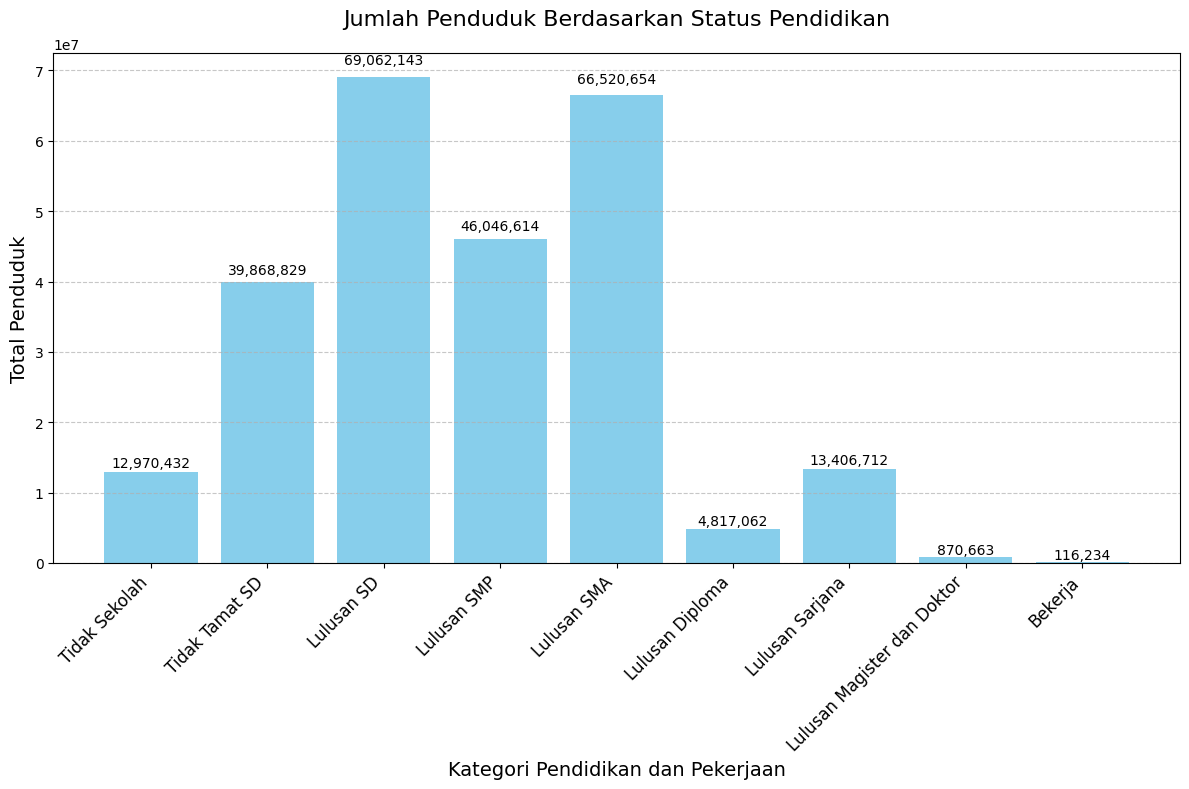

In [5]:
# Buat ukuran visualisasi
plt.figure(figsize=(12, 8))  
plt.bar(df_totals['Status'], df_totals['Total Penduduk'], color='skyblue')

# Menambahkan label dan judul
plt.xlabel('Kategori Pendidikan dan Pekerjaan', fontsize=14)
plt.ylabel('Total Penduduk', fontsize=14)
plt.title('Jumlah Penduduk Berdasarkan Status Pendidikan', fontsize=16, pad=20)

# Menambahkan grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotasi label sumbu x 
plt.xticks(rotation=45, ha='right', fontsize=12)

# Menampilkan nilai di atas bar
for i, value in enumerate(df_totals['Total Penduduk']):
    plt.text(i, value + 0.02 * value, f'{value:,}', ha='center', va='bottom', fontsize=10)

# Menampilkan plot
plt.tight_layout()
plt.show()

In [6]:
# Lakukan Kalkulasi dari Semuanya 
total_penduduk = df_totals['Total Penduduk'].sum()

In [7]:
# Hitung presentase untuk setiap kategori
df_totals['Presentase (%)'] = (df_totals['Total Penduduk'] / total_penduduk) * 100

# Temukan kategori dengan presentase tertinggi
kategori_tertinggi = df_totals.loc[df_totals['Presentase (%)'].idxmax()]

# Menampilkan hasil
print(f"Kategori dengan presentase tertinggi:")
print(f"{kategori_tertinggi['Status']}: {kategori_tertinggi['Presentase (%)']:.2f}%")

Kategori dengan presentase tertinggi:
Lulusan SD: 27.22%


In [8]:
# Hitung presentase untuk setiap kategori
df_totals['Presentase (%)'] = (df_totals['Total Penduduk'] / total_penduduk) * 100

# Bulatkan presentase ke dua desimal
df_totals['Presentase (%)'] = df_totals['Presentase (%)'].round(2)

# Urutkan DataFrame berdasarkan presentase dari yang terbesar
df_totals_sorted = df_totals.sort_values(by='Presentase (%)', ascending=False)

# Menampilkan tabel
df_totals_sorted

,Status,Total Penduduk,Presentase (%)
2,Lulusan SD,69062143,27.22
4,Lulusan SMA,66520654,26.22
3,Lulusan SMP,46046614,18.15
1,Tidak Tamat SD,39868829,15.72
6,Lulusan Sarjana,13406712,5.28
0,Tidak Sekolah,12970432,5.11
5,Lulusan Diploma,4817062,1.90
7,Lulusan Magister dan Doktor,870663,0.34
8,Bekerja,116234,0.05


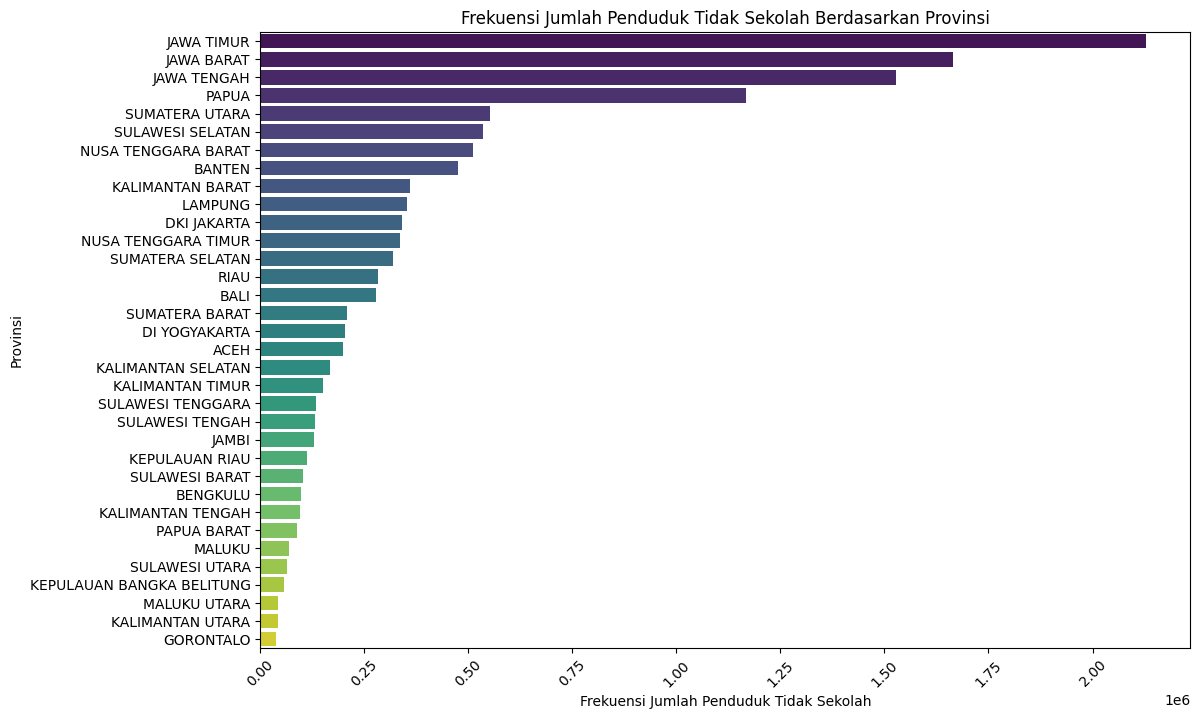

In [9]:
# Urutkan DataFrame berdasarkan kolom 'Tidak Sekolah' dari yang terbesar
data_kelulusan_sorted = data_kelulusan.sort_values(by='Tidak Sekolah', ascending=False)

# Buat plot batang
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Tidak Sekolah', y='Provinsi', data=data_kelulusan_sorted, ci=None, palette='viridis')

# Label dan judul
plt.xlabel('Frekuensi Jumlah Penduduk Tidak Sekolah')
plt.ylabel('Provinsi')
plt.title('Frekuensi Jumlah Penduduk Tidak Sekolah Berdasarkan Provinsi')

# Putar label sumbu X
plt.xticks(rotation=45)

plt.show()

In [10]:
# Urutkan DataFrame berdasarkan kolom 'Tidak Sekolah' dari yang tertinggi
data_kelulusan_sorted = data_kelulusan.sort_values(by='Tidak Sekolah', ascending=False)

# Tampilkan DataFrame
data_kelulusan_sorted[['Provinsi', 'Tidak Sekolah']].head()

,Provinsi,Tidak Sekolah
14,JAWA TIMUR,2128536
11,JAWA BARAT,1663609
12,JAWA TENGAH,1526645
33,PAPUA,1167434
1,SUMATERA UTARA,552425


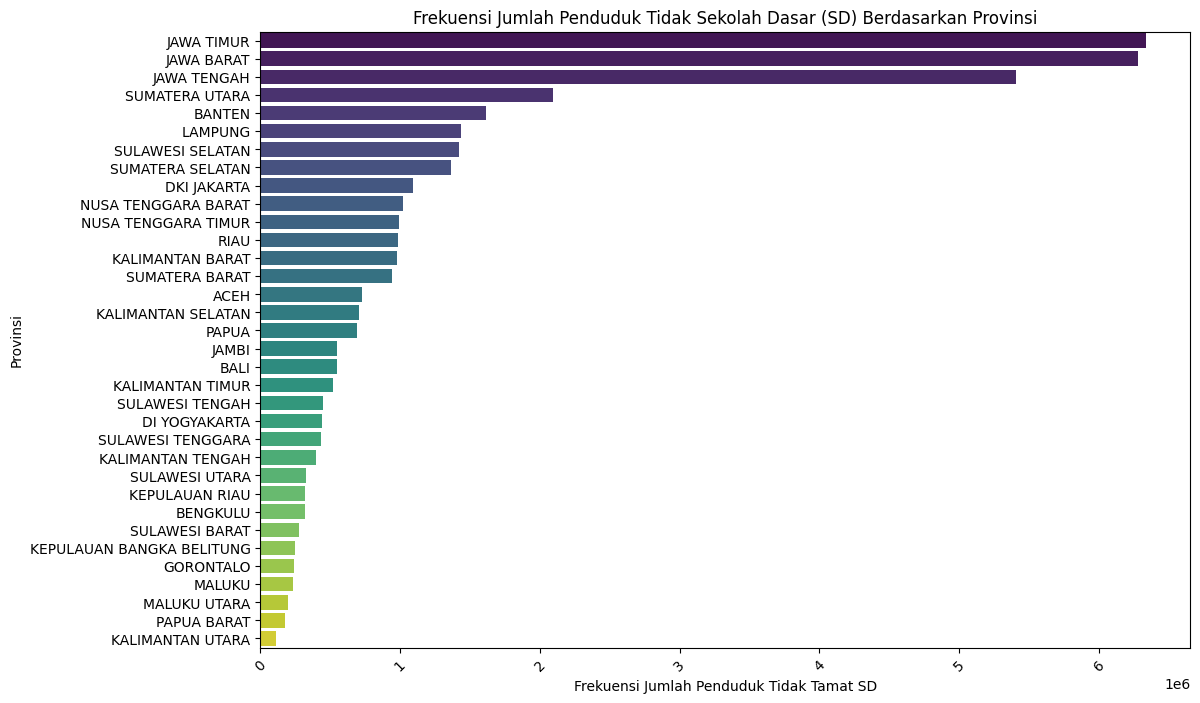

In [11]:
# Urutkan DataFrame berdasarkan kolom 'Tidak Tamat SD' dari yang tertinggi
data_kelulusan_sorted = data_kelulusan.sort_values(by='Tidak Tamat SD', ascending=False)

# Buat plot barchart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Tidak Tamat SD', y='Provinsi', data=data_kelulusan_sorted, ci=None, palette='viridis')

# Label dan judul
plt.xlabel('Frekuensi Jumlah Penduduk Tidak Tamat SD')
plt.ylabel('Provinsi')
plt.title('Frekuensi Jumlah Penduduk Tidak Sekolah Dasar (SD) Berdasarkan Provinsi')

# Putar label sumbu  X
plt.xticks(rotation=45)

plt.show()

In [12]:
# Urutkan DataFrame berdasarkan kolom 'Tidak Tamat SD' dari yang tertinggi
data_kelulusan_sorted = data_kelulusan.sort_values(by='Tidak Tamat SD', ascending=False)

# Tampilkan DataFrame
data_kelulusan_sorted[['Provinsi', 'Tidak Tamat SD']].head()

,Provinsi,Tidak Tamat SD
14,JAWA TIMUR,6336544
11,JAWA BARAT,6277199
12,JAWA TENGAH,5404506
1,SUMATERA UTARA,2091386
15,BANTEN,1612351


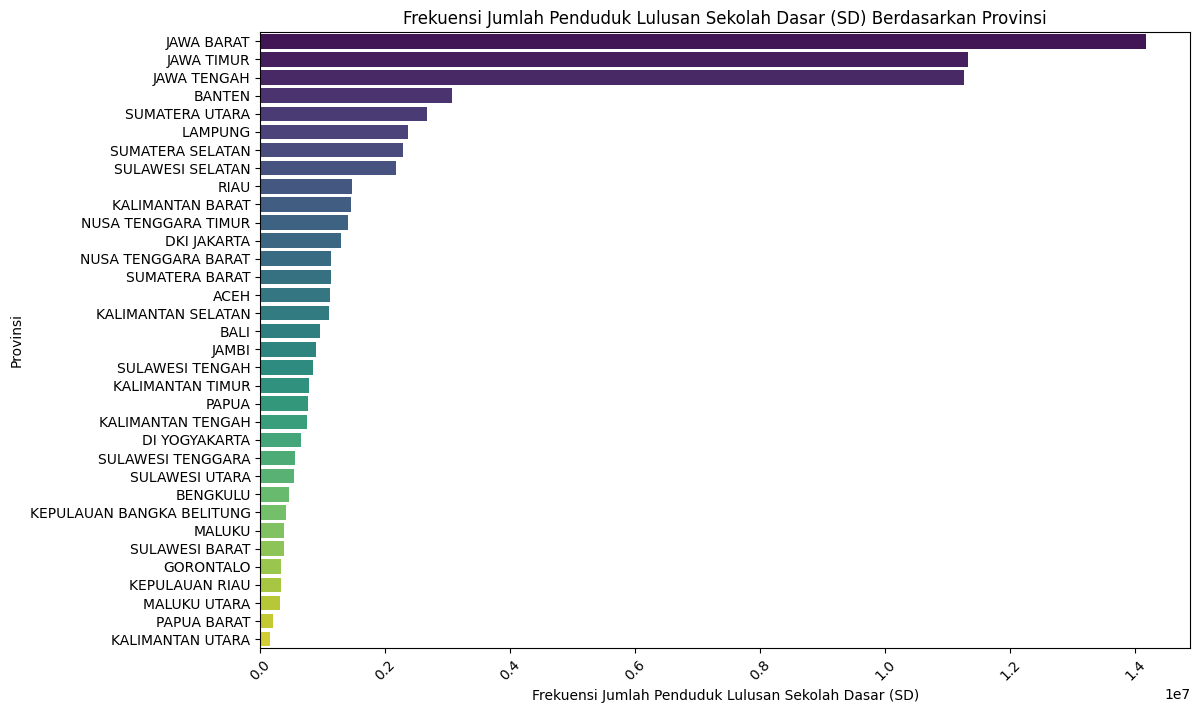

In [13]:
# Urutkan DataFrame berdasarkan kolom 'SD' dari yang tertinggi
data_kelulusan_sorted = data_kelulusan.sort_values(by='SD', ascending=False)

# Buat plot barchart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='SD', y='Provinsi', data=data_kelulusan_sorted, ci=None, palette='viridis')

# Label dan judul
plt.xlabel('Frekuensi Jumlah Penduduk Lulusan Sekolah Dasar (SD)')
plt.ylabel('Provinsi')
plt.title('Frekuensi Jumlah Penduduk Lulusan Sekolah Dasar (SD) Berdasarkan Provinsi')

# Putar label sumbu X
plt.xticks(rotation=45)

plt.show()

In [14]:
# Urutkan DataFrame berdasarkan kolom 'SD' dari yang tertinggi
data_kelulusan_sorted = data_kelulusan.sort_values(by='SD', ascending=False)

# Tampilkan DataFrame
data_kelulusan_sorted[['Provinsi', 'SD']].head()

,Provinsi,SD
11,JAWA BARAT,14169685
14,JAWA TIMUR,11323830
12,JAWA TENGAH,11254799
15,BANTEN,3063217
1,SUMATERA UTARA,2668169


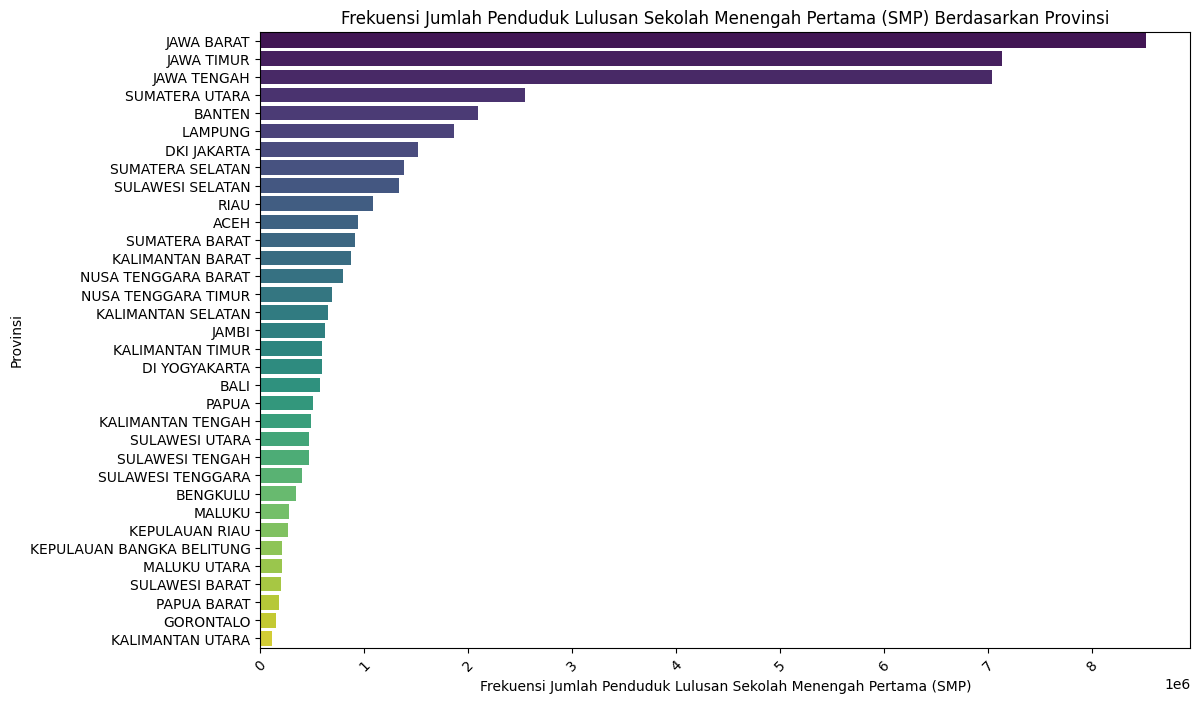

In [15]:
# Urutkan DataFrame berdasarkan kolom 'SMP' dari yang tertinggi
data_kelulusan_sorted = data_kelulusan.sort_values(by='SMP', ascending=False)

# Buat plot barchart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='SMP', y='Provinsi', data=data_kelulusan_sorted, ci=None, palette='viridis')

# Label dan judul
plt.xlabel('Frekuensi Jumlah Penduduk Lulusan Sekolah Menengah Pertama (SMP)')
plt.ylabel('Provinsi')
plt.title('Frekuensi Jumlah Penduduk Lulusan Sekolah Menengah Pertama (SMP) Berdasarkan Provinsi')

# Putar label sumbu X
plt.xticks(rotation=45)

plt.show()

In [16]:
# Urutkan DataFrame berdasarkan kolom 'Tidak Sekolah' secara menurun
data_kelulusan_sorted = data_kelulusan.sort_values(by='SMP', ascending=False)

# Tampilkan DataFrame
data_kelulusan_sorted[['Provinsi', 'SMP']].head()

,Provinsi,SMP
11,JAWA BARAT,8517726
14,JAWA TIMUR,7129781
12,JAWA TENGAH,7039333
1,SUMATERA UTARA,2547512
15,BANTEN,2093237


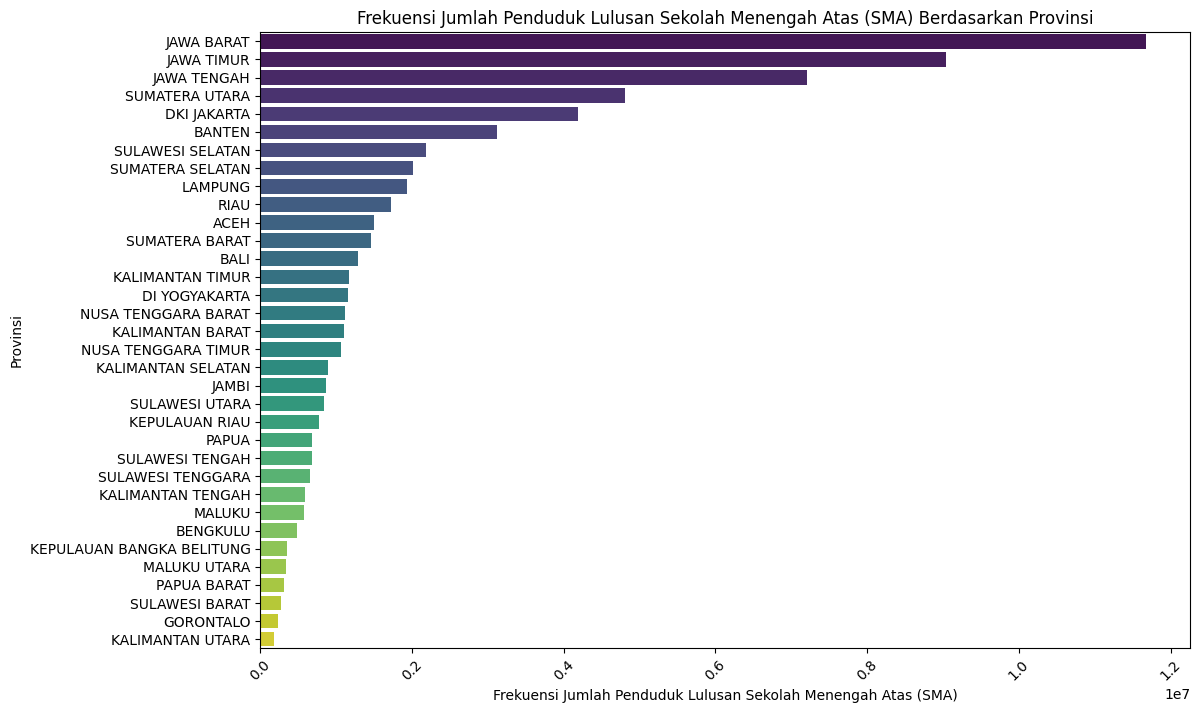

In [17]:
# Urutkan DataFrame berdasarkan kolom 'SMA' dari yang tertinggi
data_kelulusan_sorted = data_kelulusan.sort_values(by='SMA', ascending=False)

# Buat plot barchart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='SMA', y='Provinsi', data=data_kelulusan_sorted, ci=None, palette='viridis')

# Label dan judul
plt.xlabel('Frekuensi Jumlah Penduduk Lulusan Sekolah Menengah Atas (SMA)')
plt.ylabel('Provinsi')
plt.title('Frekuensi Jumlah Penduduk Lulusan Sekolah Menengah Atas (SMA) Berdasarkan Provinsi')

# Putar label sumbu X
plt.xticks(rotation=45)

plt.show()

In [18]:
# Urutkan DataFrame berdasarkan kolom 'SMA' dari yang tertinggi
data_kelulusan_sorted = data_kelulusan.sort_values(by='SMA', ascending=False)

# Tampilkan DataFrame
data_kelulusan_sorted[['Provinsi', 'SMA']].head()

,Provinsi,SMA
11,JAWA BARAT,11676493
14,JAWA TIMUR,9035692
12,JAWA TENGAH,7209749
1,SUMATERA UTARA,4806728
10,DKI JAKARTA,4193695


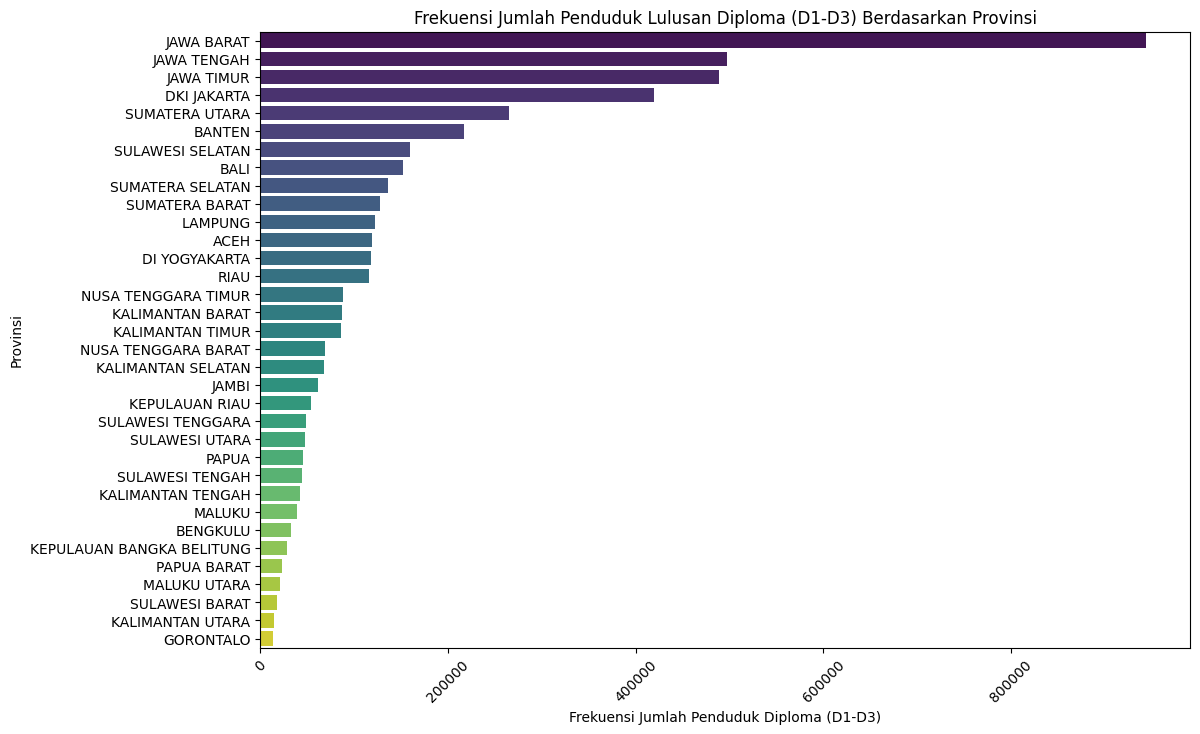

In [19]:
# Urutkan DataFrame berdasarkan kolom 'D1-D3' dari yang tertinggi
data_kelulusan_sorted = data_kelulusan.sort_values(by='D1-D3', ascending=False)

# Buat plot barchart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='D1-D3', y='Provinsi', data=data_kelulusan_sorted, ci=None, palette='viridis')

# Label dan judul
plt.xlabel('Frekuensi Jumlah Penduduk Diploma (D1-D3)')
plt.ylabel('Provinsi')
plt.title('Frekuensi Jumlah Penduduk Lulusan Diploma (D1-D3) Berdasarkan Provinsi')

# Putar label sumbu X
plt.xticks(rotation=45)

plt.show()

In [20]:
# Urutkan DataFrame berdasarkan kolom 'D1-D3' dari yang tertinggi
data_kelulusan_sorted = data_kelulusan.sort_values(by='D1-D3', ascending=False)

# Tampilkan DataFrame
data_kelulusan_sorted[['Provinsi', 'D1-D3']].head()

,Provinsi,D1-D3
11,JAWA BARAT,943551
12,JAWA TENGAH,497011
14,JAWA TIMUR,489100
10,DKI JAKARTA,419567
1,SUMATERA UTARA,264668


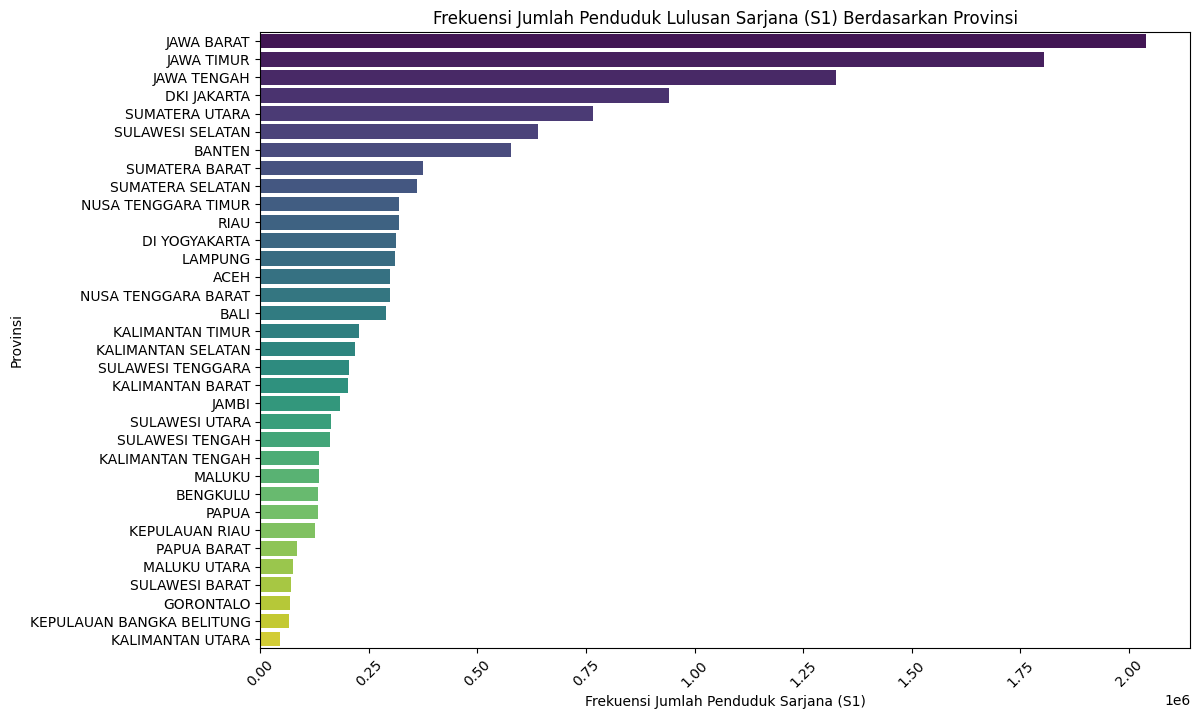

In [21]:
# Urutkan DataFrame berdasarkan kolom 'S1' dari yang tertinggi
data_kelulusan_sorted = data_kelulusan.sort_values(by='S1', ascending=False)

# Buat plot barchart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='S1', y='Provinsi', data=data_kelulusan_sorted, ci=None, palette='viridis')

# Label dan judul
plt.xlabel('Frekuensi Jumlah Penduduk Sarjana (S1)')
plt.ylabel('Provinsi')
plt.title('Frekuensi Jumlah Penduduk Lulusan Sarjana (S1) Berdasarkan Provinsi')

# Putar label sumbu X
plt.xticks(rotation=45)

plt.show()

In [22]:
# Urutkan DataFrame berdasarkan kolom 'S1' secara menurun
data_kelulusan_sorted = data_kelulusan.sort_values(by='S1', ascending=False)

# Tampilkan DataFrame
data_kelulusan_sorted[['Provinsi', 'S1']].head()

,Provinsi,S1
11,JAWA BARAT,2039031
14,JAWA TIMUR,1803954
12,JAWA TENGAH,1325855
10,DKI JAKARTA,941007
1,SUMATERA UTARA,764922


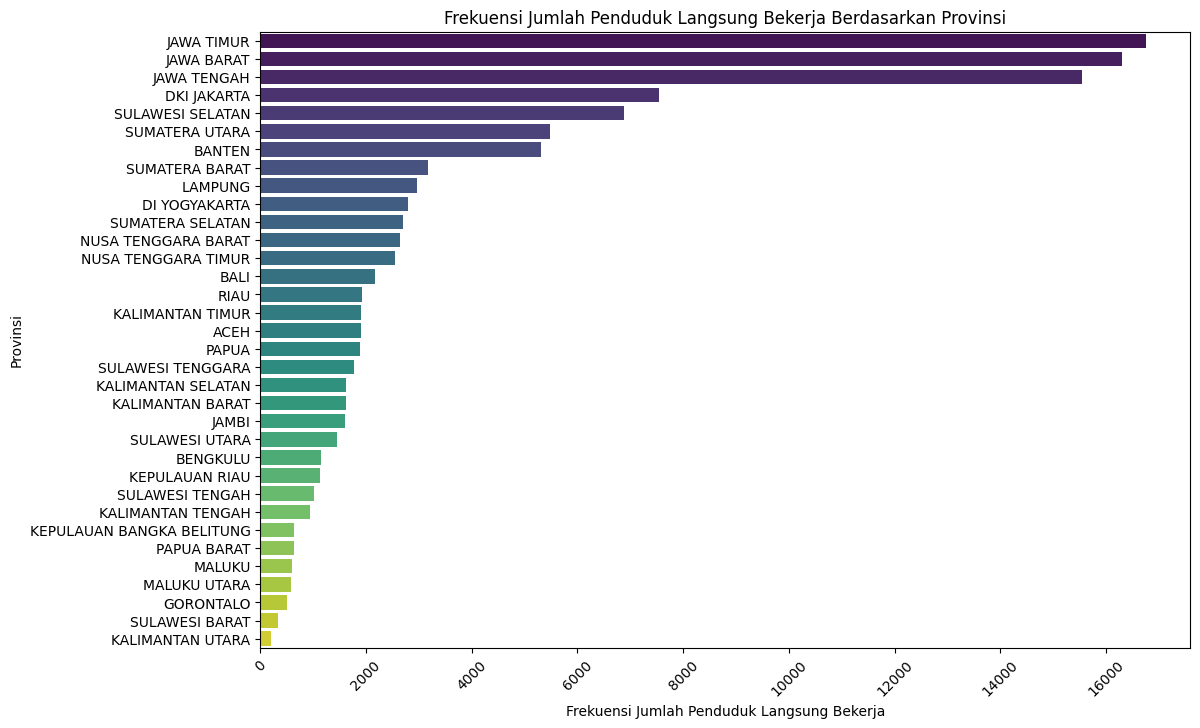

In [23]:
# Urutkan DataFrame berdasarkan kolom 'Bekerja' dari yang tertinggi
data_kelulusan_sorted = data_kelulusan.sort_values(by='Bekerja', ascending=False)

# Buat plot barchart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Bekerja', y='Provinsi', data=data_kelulusan_sorted, ci=None, palette='viridis')

# Label dan judul
plt.xlabel('Frekuensi Jumlah Penduduk Langsung Bekerja')
plt.ylabel('Provinsi')
plt.title('Frekuensi Jumlah Penduduk Langsung Bekerja Berdasarkan Provinsi')

# Putar label sumbu X
plt.xticks(rotation=45)

plt.show()

In [24]:
# Urutkan DataFrame berdasarkan kolom 'Bekerja' dari yang tertinggi
data_kelulusan_sorted = data_kelulusan.sort_values(by='Bekerja', ascending=False)

# Tampilkan DataFrame
data_kelulusan_sorted[['Provinsi', 'Bekerja']].head()

,Provinsi,Bekerja
14,JAWA TIMUR,16754
11,JAWA BARAT,16301
12,JAWA TENGAH,15541
10,DKI JAKARTA,7542
26,SULAWESI SELATAN,6885


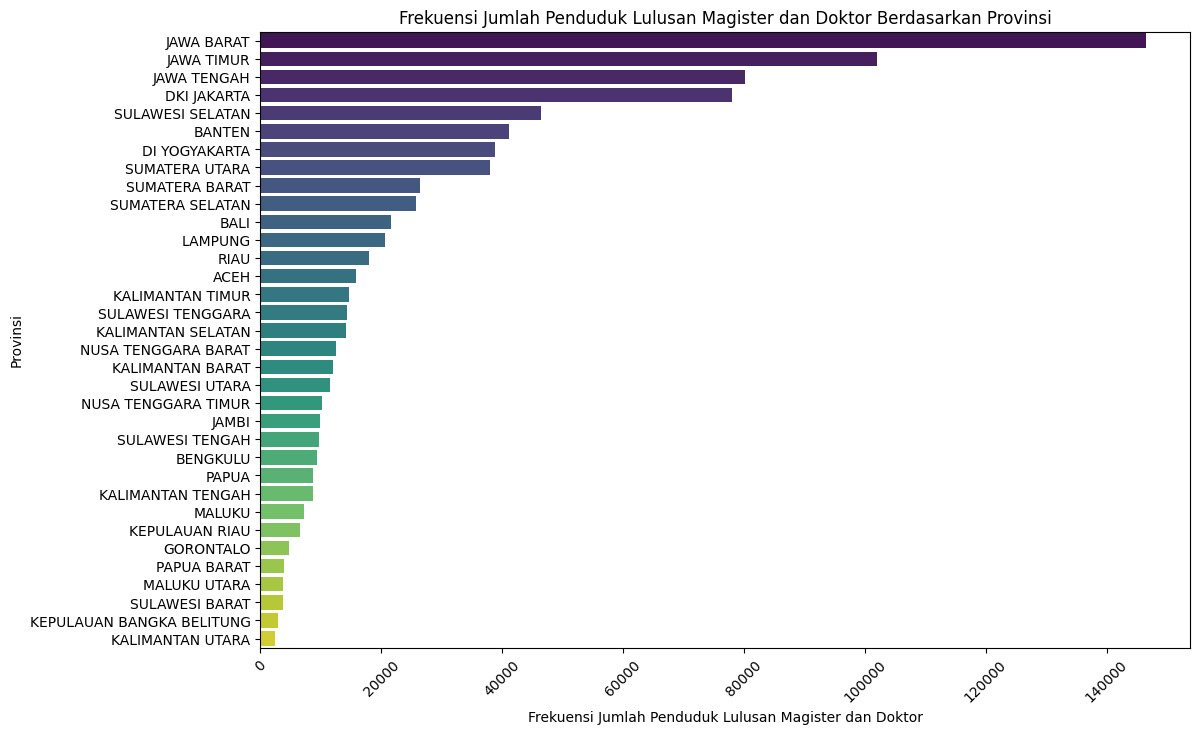

In [25]:
# Urutkan DataFrame berdasarkan kolom 'S2-S3' dari yang tertinggi
data_kelulusan_sorted = data_kelulusan.sort_values(by='S2-S3', ascending=False)

# Buat plot barchart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='S2-S3', y='Provinsi', data=data_kelulusan_sorted, ci=None, palette='viridis')

# Label dan judul
plt.xlabel('Frekuensi Jumlah Penduduk Lulusan Magister dan Doktor')
plt.ylabel('Provinsi')
plt.title('Frekuensi Jumlah Penduduk Lulusan Magister dan Doktor Berdasarkan Provinsi')

# Putar label sumbu X
plt.xticks(rotation=45)

plt.show()

In [26]:
# Urutkan DataFrame berdasarkan kolom 'S2-S3' dari yang tertinggi
data_kelulusan_sorted = data_kelulusan.sort_values(by='S2-S3', ascending=False)

# Tampilkan DataFrame
data_kelulusan_sorted[['Provinsi', 'S2-S3']].head()

,Provinsi,S2-S3
11,JAWA BARAT,146513
14,JAWA TIMUR,101944
12,JAWA TENGAH,80245
10,DKI JAKARTA,78047
26,SULAWESI SELATAN,46362


### Jenis Pekerjaan Penduduk Indonesia


In [27]:
file_path = 'data/Data Sensus 2022.xlsx'
dpk_population = pd.read_excel(file_path, sheet_name='08 - Status Pekerjaan')
dpk_population.head()

,Jenis Pekerjaan,Tidak Sekolah,Tidak Tamat SD,SD,SLTP,SMA,SMK,Diploma,Sarjana,Total
0,"Pertanian, Kehutanan, dan Perikanan",1460026,9190398,14995306,6541946,4372396,1507526,165932,470466,38703996
1,Pertambangan dan Penggalian,14818,168593,423249,285326,344524,161305,23269,109073,1530157
2,Industri Pengolahan,135553,1595696,4445062,3992386,4110218,3715198,326655,851629,19172397
3,Pengadaan Listrik dan Gas,175,3602,15312,37218,92540,76793,20959,64525,311124
4,"Pengadaan Air, Pengelolaan Sampah, Limbah, dan...",1380,100331,152893,91961,72420,58569,5699,27897,511150


In [28]:
# Copy Dataset
dpk_population_cop = dpk_population.copy()

In [29]:
# Berapa Banyak Masing Lulusan Penduduk di indonesia
totals = {
    'Status': [
        'Tidak Sekolah',
        'Tidak Tamat SD',
        'SD',
        'SLTP',
        'SMA',
        'SMK',
        'Diploma',
        'Sarjana'
    ],
    'Total Penduduk': [
        dpk_population_cop['Tidak Sekolah'].sum(),
        dpk_population_cop['Tidak Tamat SD'].sum(),
        dpk_population_cop['SD'].sum(),
        dpk_population_cop['SLTP'].sum(),
        dpk_population_cop['SMA'].sum(),
        dpk_population_cop['SMK'].sum(),
        dpk_population_cop['Diploma'].sum(),
        dpk_population_cop['Sarjana'].sum()
    ]
}

# Membuat DataFrame dari totals
df_totals = pd.DataFrame(totals)

# Menampilkan tabel
df_totals


,Status,Total Penduduk
0,Tidak Sekolah,1964904
1,Tidak Tamat SD,16187137
2,SD,34342574
3,SLTP,23724640
4,SMA,26422045
5,SMK,15983826
6,Diploma,3312508
7,Sarjana,13359079


In [30]:
### Berapa Banyak penduduk yang bekerja
jumlah_bekerja = df_totals['Total Penduduk'].sum()

print('Jumlah Penduduk Yang Bekerja yaitu :', jumlah_bekerja, 'Orang')

Jumlah Penduduk Yang Bekerja yaitu : 135296713 Orang


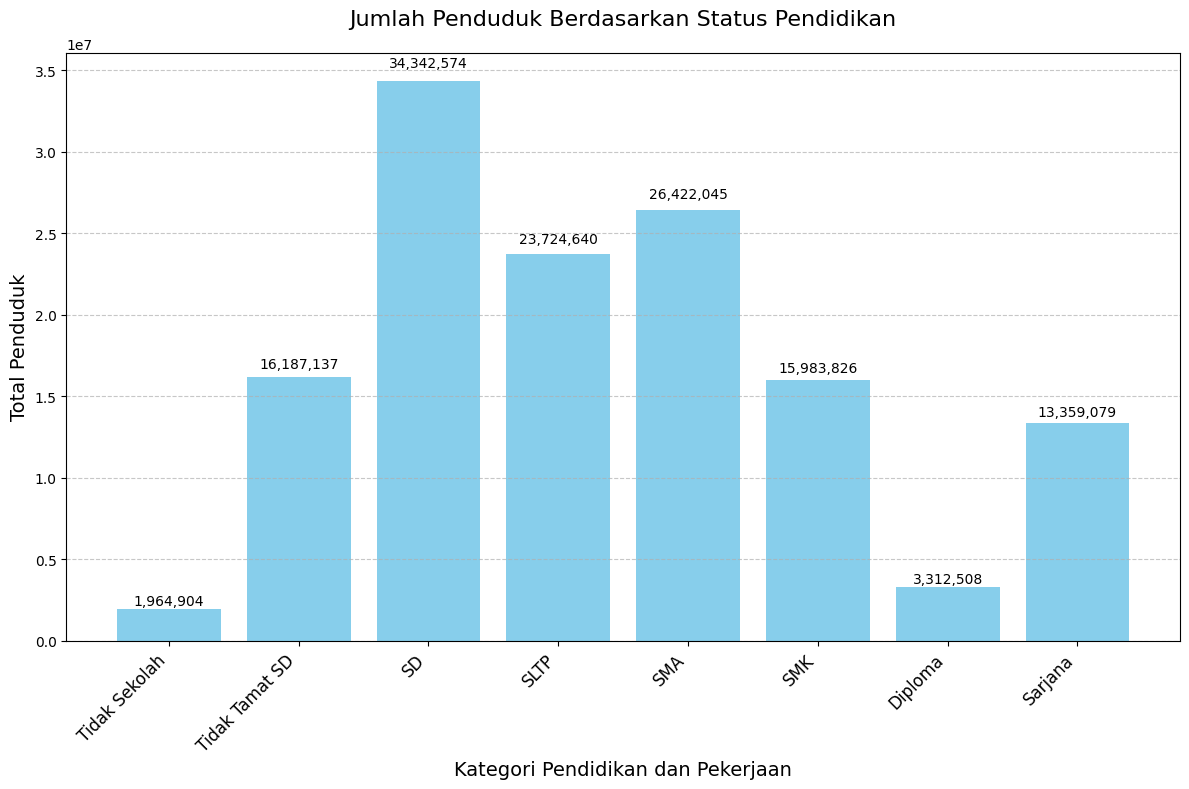

In [31]:
# Buat Visualisasi 
plt.figure(figsize=(12, 8)) 
plt.bar(df_totals['Status'], df_totals['Total Penduduk'], color='skyblue')

# Menambahkan label dan judul
plt.xlabel('Kategori Pendidikan dan Pekerjaan', fontsize=14)
plt.ylabel('Total Penduduk', fontsize=14)
plt.title('Jumlah Penduduk Berdasarkan Status Pendidikan', fontsize=16, pad=20)

# Menambahkan grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotasi label sumbu x
plt.xticks(rotation=45, ha='right', fontsize=12)

# Menampilkan nilai
for i, value in enumerate(df_totals['Total Penduduk']):
    plt.text(i, value + 0.02 * value, f'{value:,}', ha='center', va='bottom', fontsize=10)

# Menampilkan plot
plt.tight_layout()
plt.show()

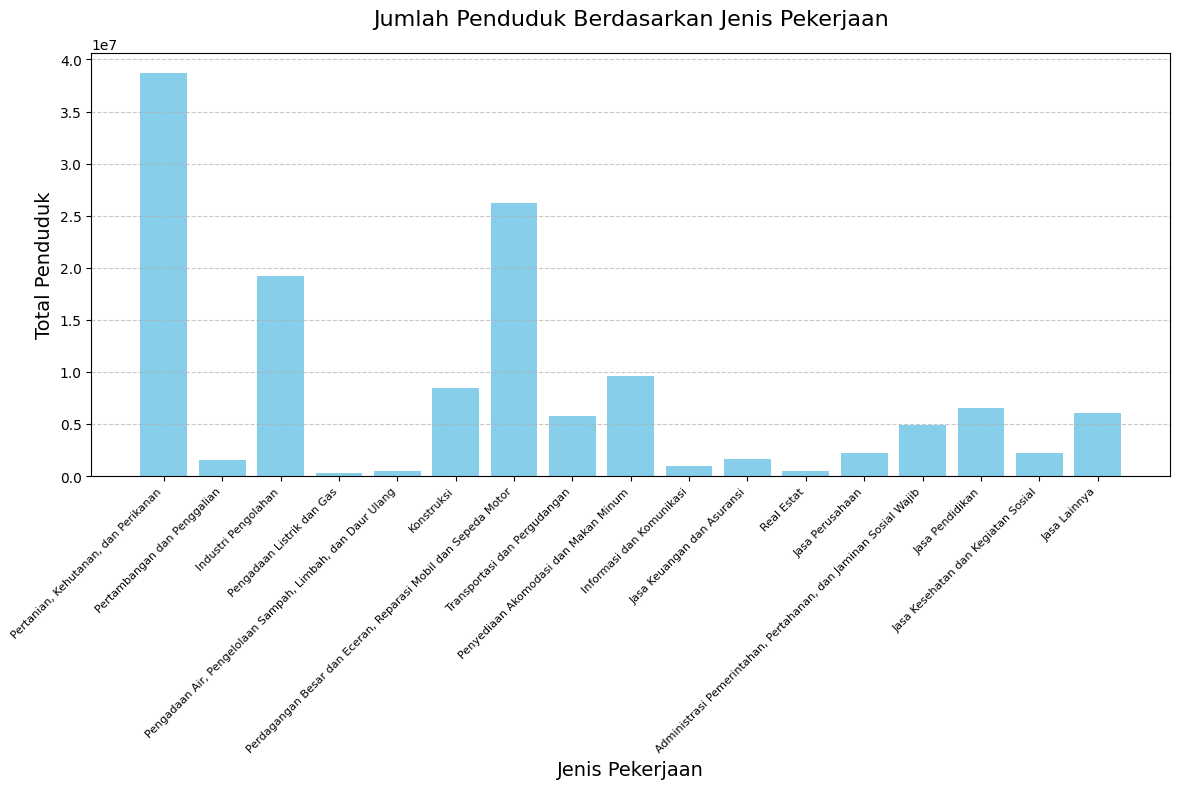

In [32]:
# Buat Visualisasi
plt.figure(figsize=(12, 8)) 
plt.bar(dpk_population['Jenis Pekerjaan'], dpk_population['Total'], color='skyblue')

# Menambahkan label dan judul
plt.xlabel('Jenis Pekerjaan', fontsize=14)
plt.ylabel('Total Penduduk', fontsize=14)
plt.title('Jumlah Penduduk Berdasarkan Jenis Pekerjaan', fontsize=16, pad=20)

# Menambahkan grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotasi label sumbu x
plt.xticks(rotation=45, ha='right', fontsize=8)


# Menampilkan plot
plt.tight_layout()
plt.show()

In [33]:
import pandas as pd

# Memilih kolom yang akan dianalisis
dpk_population_count = dpk_population[['Jenis Pekerjaan', 'Total']]

# Mengurutkan berdasarkan kolom 'Total' dari yang tertinggi
dpk_population_sorted = dpk_population_count.sort_values(by='Total', ascending=False)

# Menampilkan tabel
dpk_population_sorted.head()

,Jenis Pekerjaan,Total
0,"Pertanian, Kehutanan, dan Perikanan",38703996
6,"Perdagangan Besar dan Eceran, Reparasi Mobil d...",26193890
2,Industri Pengolahan,19172397
8,Penyediaan Akomodasi dan Makan Minum,9607709
5,Konstruksi,8481349


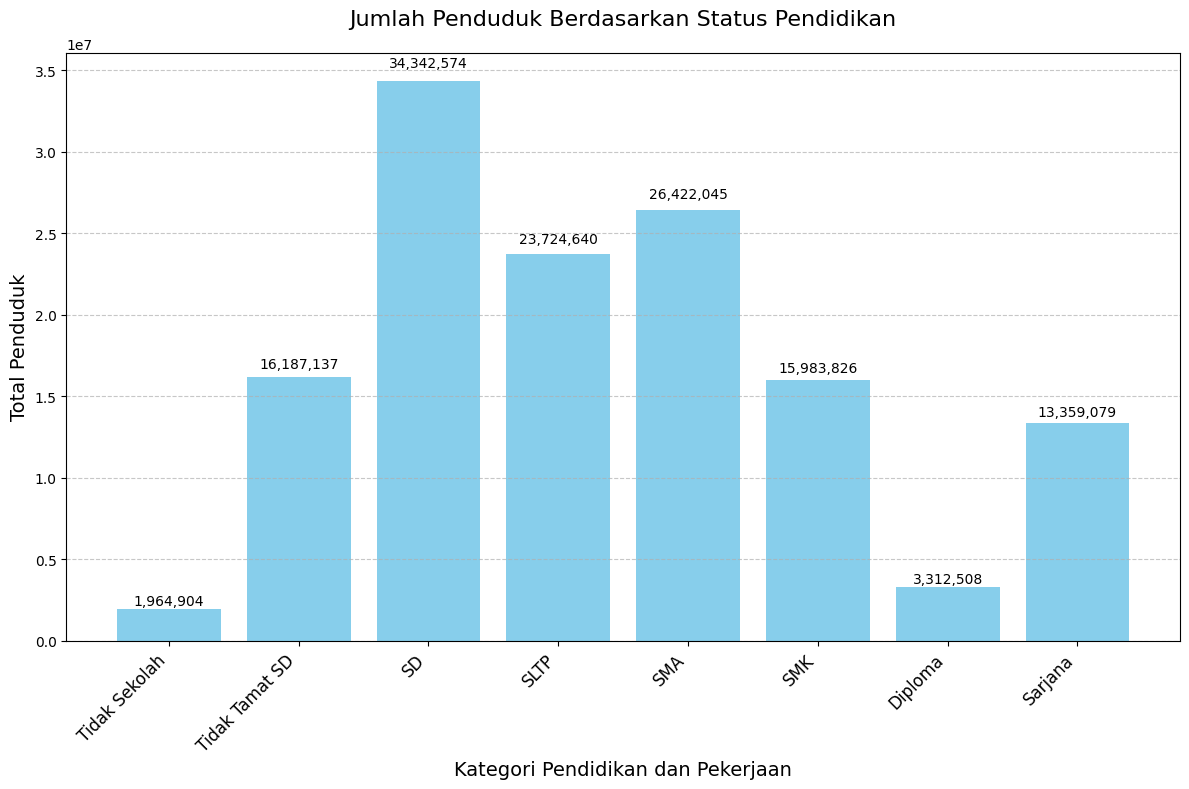

In [34]:
# Buat Visualisasi
plt.figure(figsize=(12, 8)) 
plt.bar(df_totals['Status'], df_totals['Total Penduduk'], color='skyblue')

# Menambahkan label dan judul
plt.xlabel('Kategori Pendidikan dan Pekerjaan', fontsize=14)
plt.ylabel('Total Penduduk', fontsize=14)
plt.title('Jumlah Penduduk Berdasarkan Status Pendidikan', fontsize=16, pad=20)

# Menambahkan grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotasi label sumbu x
plt.xticks(rotation=45, ha='right', fontsize=12)

# Menampilkan nilai
for i, value in enumerate(df_totals['Total Penduduk']):
    plt.text(i, value + 0.02 * value, f'{value:,}', ha='center', va='bottom', fontsize=10)

# Menampilkan plot
plt.tight_layout()
plt.show()

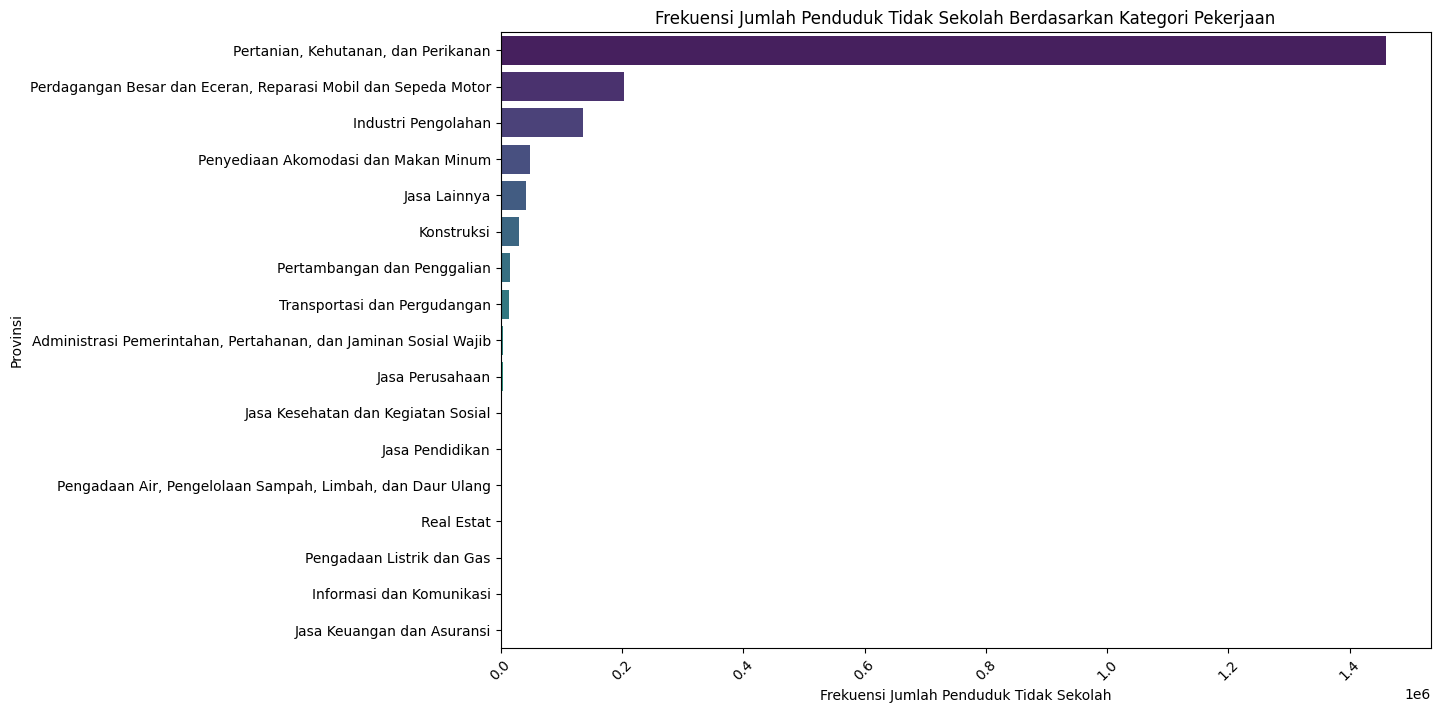

In [35]:
# Menampilkan jenis pekerjaan dari individu yang tidak sekolah
dpk_population_status = dpk_population.sort_values(by='Tidak Sekolah', ascending=False)

# Buat plot batang
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Tidak Sekolah', y='Jenis Pekerjaan', data=dpk_population_status, ci=None, palette='viridis')

# Label dan judul
plt.xlabel('Frekuensi Jumlah Penduduk Tidak Sekolah')
plt.ylabel('Provinsi')
plt.title('Frekuensi Jumlah Penduduk Tidak Sekolah Berdasarkan Kategori Pekerjaan')

# Putar label sumbu X jika perlu
plt.xticks(rotation=45)

plt.show()

In [36]:
# Mengurutkan data berdasarkan 'Tidak Sekolah'
dpk_population_status = dpk_population.sort_values(by='Tidak Sekolah', ascending=False)

# Membuat tabel data
tabel_data = dpk_population_status[['Jenis Pekerjaan', 'Tidak Sekolah']]
tabel_data.head()

,Jenis Pekerjaan,Tidak Sekolah
0,"Pertanian, Kehutanan, dan Perikanan",1460026
6,"Perdagangan Besar dan Eceran, Reparasi Mobil d...",202832
2,Industri Pengolahan,135553
8,Penyediaan Akomodasi dan Makan Minum,48230
16,Jasa Lainnya,41488


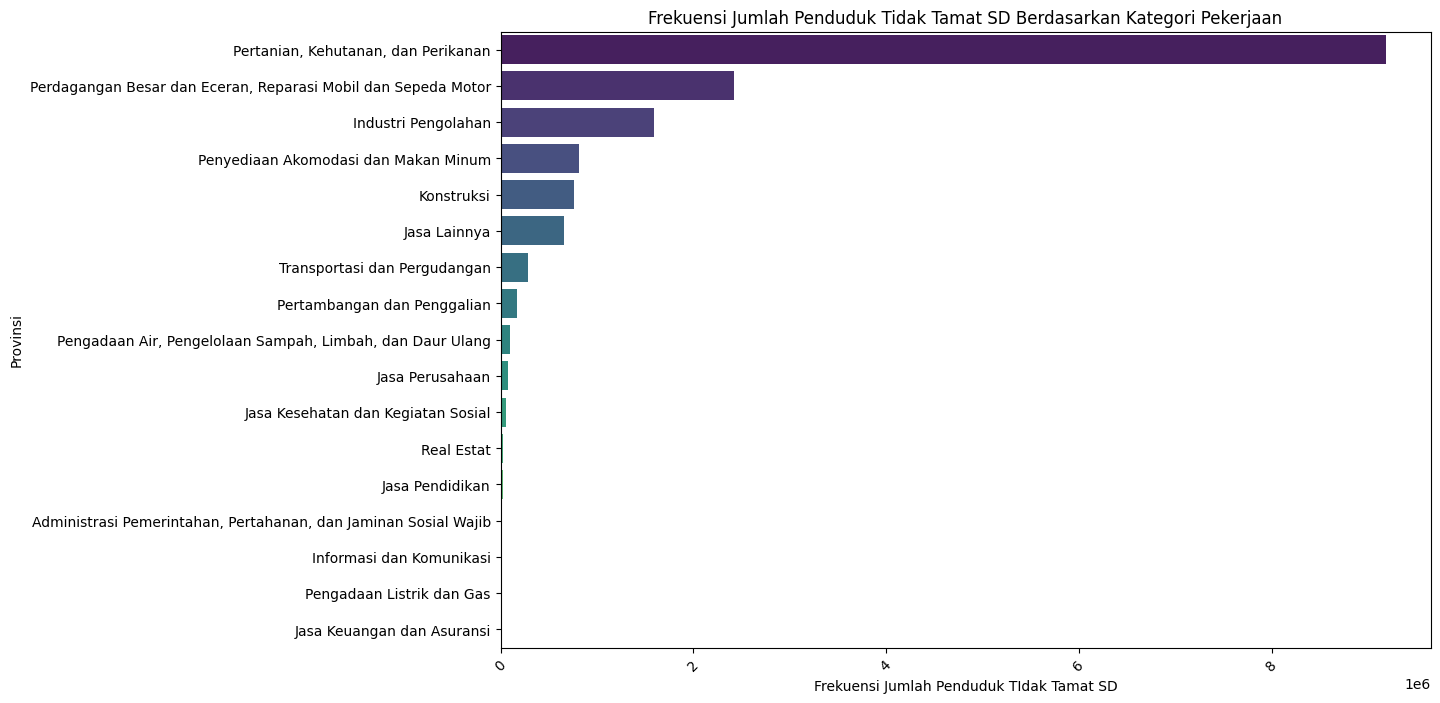

In [37]:
# Menampilkan jenis pekerjaan dari individu yang tidak tamat SD
dpk_population_status = dpk_population.sort_values(by='Tidak Tamat SD', ascending=False)

# Buat plot barchart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Tidak Tamat SD', y='Jenis Pekerjaan', data=dpk_population_status, ci=None, palette='viridis')

# Label dan judul
plt.xlabel('Frekuensi Jumlah Penduduk TIdak Tamat SD')
plt.ylabel('Provinsi')
plt.title('Frekuensi Jumlah Penduduk Tidak Tamat SD Berdasarkan Kategori Pekerjaan')

# Putar label sumbu X
plt.xticks(rotation=45)

plt.show()

In [38]:
# Mengurutkan data berdasarkan kolom 'Tidak Tamat SD'
dpk_population_status = dpk_population.sort_values(by='Tidak Tamat SD', ascending=False)

# Membuat tabel data
tabel_data = dpk_population_status[['Jenis Pekerjaan', 'Tidak Tamat SD']]
tabel_data.head()

,Jenis Pekerjaan,Tidak Tamat SD
0,"Pertanian, Kehutanan, dan Perikanan",9190398
6,"Perdagangan Besar dan Eceran, Reparasi Mobil d...",2427002
2,Industri Pengolahan,1595696
8,Penyediaan Akomodasi dan Makan Minum,818798
5,Konstruksi,759292


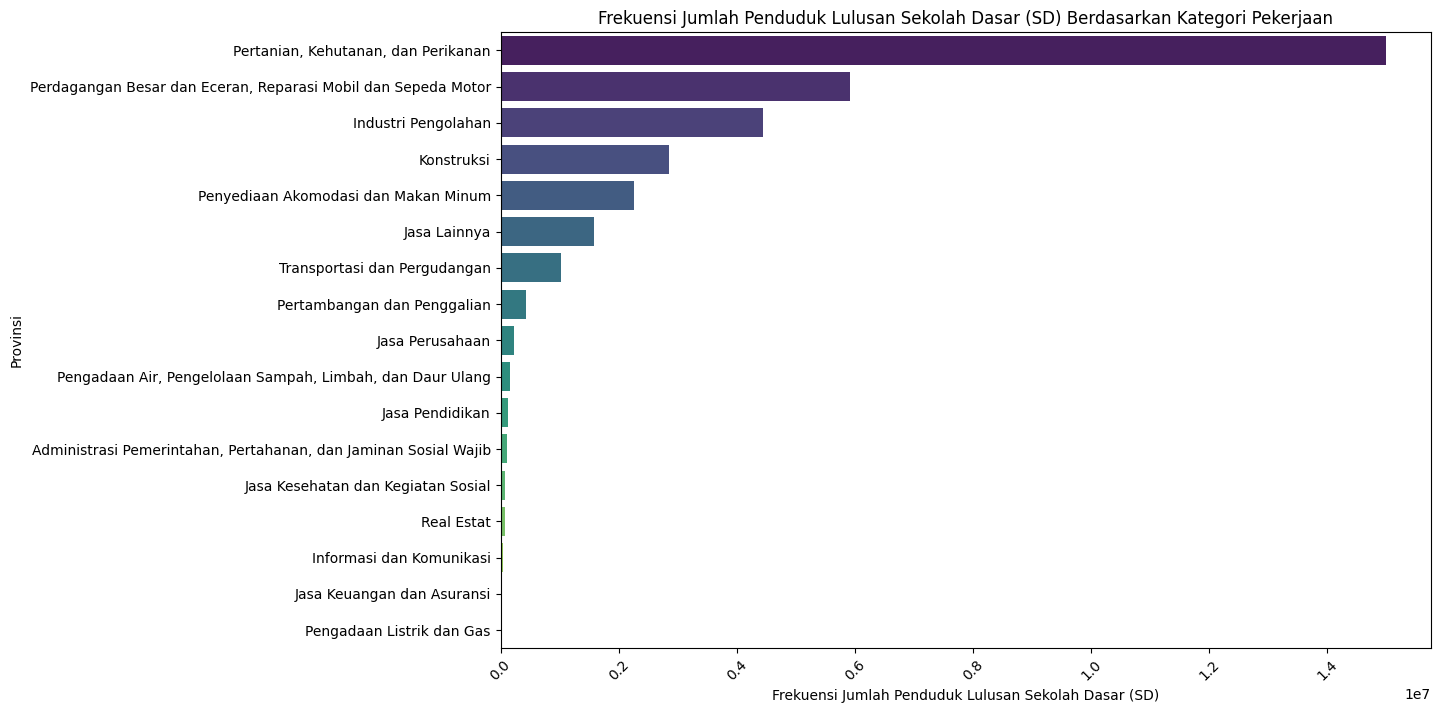

In [39]:
# Menampilkan jenis pekerjaan dari individu yang tidak sekolah
dpk_population_status = dpk_population.sort_values(by='SD', ascending=False)

# Buat plot batang
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='SD', y='Jenis Pekerjaan', data=dpk_population_status, ci=None, palette='viridis')

# Label dan judul
plt.xlabel('Frekuensi Jumlah Penduduk Lulusan Sekolah Dasar (SD)')
plt.ylabel('Provinsi')
plt.title('Frekuensi Jumlah Penduduk Lulusan Sekolah Dasar (SD) Berdasarkan Kategori Pekerjaan')

# Putar label sumbu X jika perlu
plt.xticks(rotation=45)

plt.show()

In [40]:
# Mengurutkan data berdasarkan yang luluan SD
dpk_population_status = dpk_population.sort_values(by='SD', ascending=False)

# Membuat tabel data
tabel_data = dpk_population_status[['Jenis Pekerjaan', 'SD']]
tabel_data.head()

,Jenis Pekerjaan,SD
0,"Pertanian, Kehutanan, dan Perikanan",14995306
6,"Perdagangan Besar dan Eceran, Reparasi Mobil d...",5919960
2,Industri Pengolahan,4445062
5,Konstruksi,2857768
8,Penyediaan Akomodasi dan Makan Minum,2254588


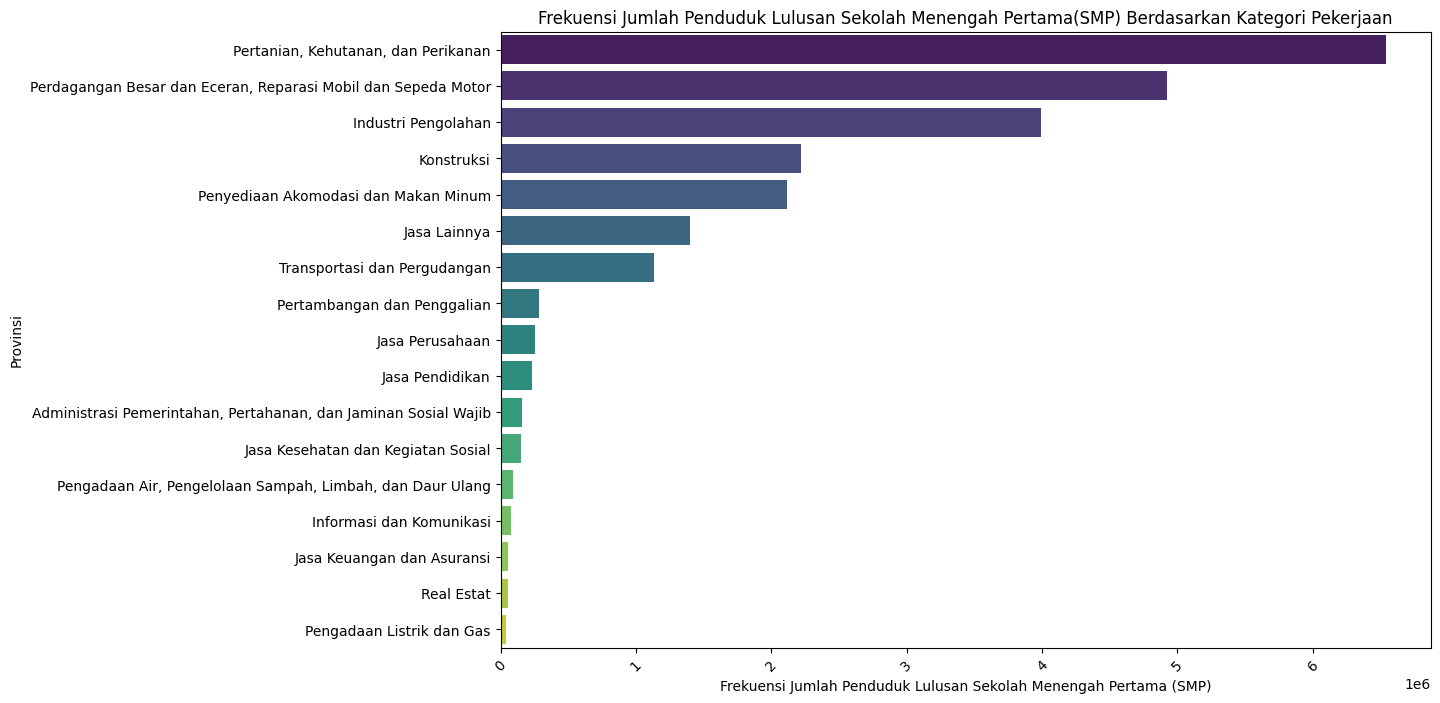

In [41]:
# Menampilkan jenis pekerjaan dari individu lulusan SLTP
dpk_population_status = dpk_population.sort_values(by='SLTP', ascending=False)

# Buat plot barchart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='SLTP', y='Jenis Pekerjaan', data=dpk_population_status, ci=None, palette='viridis')

# Label dan judul
plt.xlabel('Frekuensi Jumlah Penduduk Lulusan Sekolah Menengah Pertama (SMP)')
plt.ylabel('Provinsi')
plt.title('Frekuensi Jumlah Penduduk Lulusan Sekolah Menengah Pertama(SMP) Berdasarkan Kategori Pekerjaan')

# Putar label sumbu X
plt.xticks(rotation=45)

plt.show()

In [42]:
# Mengurutkan data berdasarkan kolom 'SLTP'
dpk_population_status = dpk_population.sort_values(by='SLTP', ascending=False)

# Membuat tabel data
tabel_data = dpk_population_status[['Jenis Pekerjaan', 'SLTP']]
tabel_data.head()

,Jenis Pekerjaan,SLTP
0,"Pertanian, Kehutanan, dan Perikanan",6541946
6,"Perdagangan Besar dan Eceran, Reparasi Mobil d...",4923785
2,Industri Pengolahan,3992386
5,Konstruksi,2217009
8,Penyediaan Akomodasi dan Makan Minum,2114494


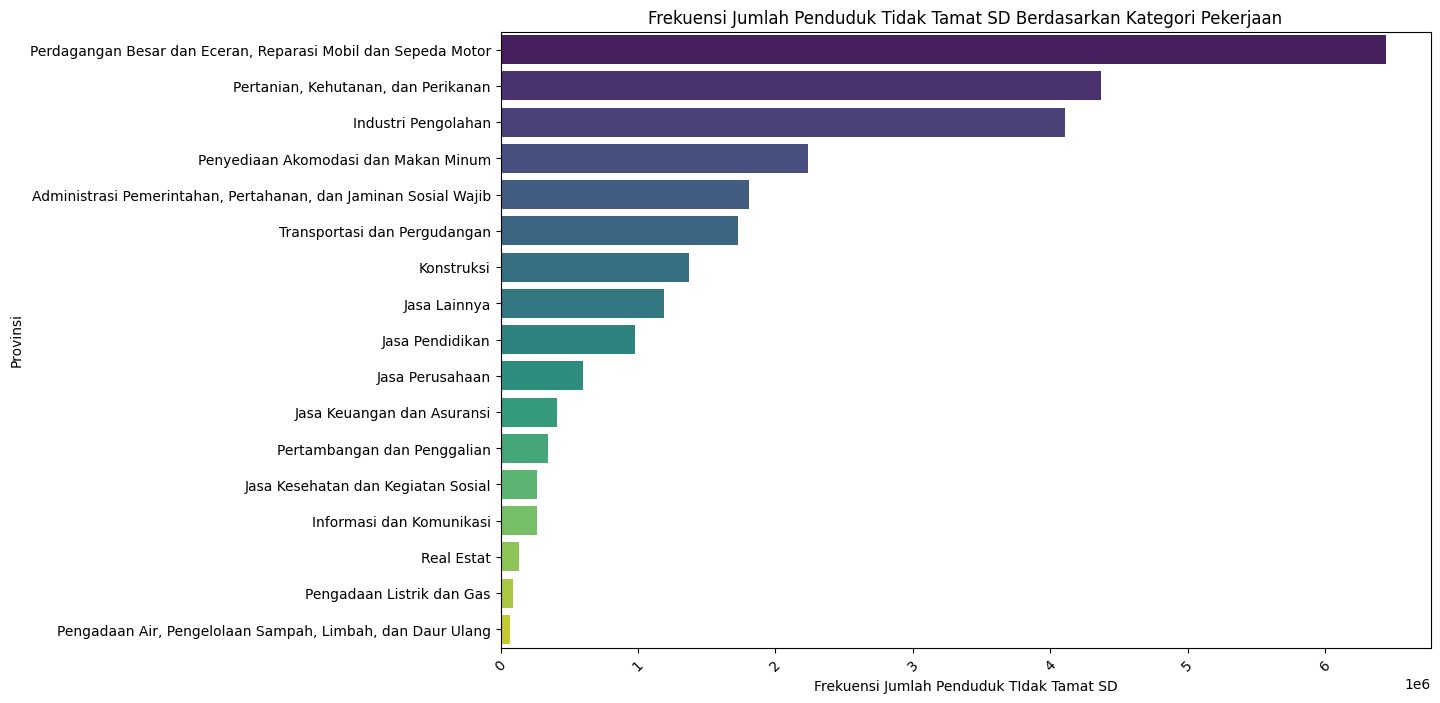

In [43]:
# Menampilkan jenis pekerjaan dari individu lulusan SMA
dpk_population_status = dpk_population.sort_values(by='SMA', ascending=False)

# Buat plot barchart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='SMA', y='Jenis Pekerjaan', data=dpk_population_status, ci=None, palette='viridis')

# Label dan judul
plt.xlabel('Frekuensi Jumlah Penduduk TIdak Tamat SD')
plt.ylabel('Provinsi')
plt.title('Frekuensi Jumlah Penduduk Tidak Tamat SD Berdasarkan Kategori Pekerjaan')

# Putar label sumbu X
plt.xticks(rotation=45)

plt.show()

In [44]:
# Mengurutkan data berdasarkan kolom 'SMA'
dpk_population_status = dpk_population.sort_values(by='SMA', ascending=False)

# Membuat tabel data
tabel_data = dpk_population_status[['Jenis Pekerjaan', 'SMA']]
tabel_data.head()

,Jenis Pekerjaan,SMA
6,"Perdagangan Besar dan Eceran, Reparasi Mobil d...",6444837
0,"Pertanian, Kehutanan, dan Perikanan",4372396
2,Industri Pengolahan,4110218
8,Penyediaan Akomodasi dan Makan Minum,2237652
13,"Administrasi Pemerintahan, Pertahanan, dan Jam...",1805628


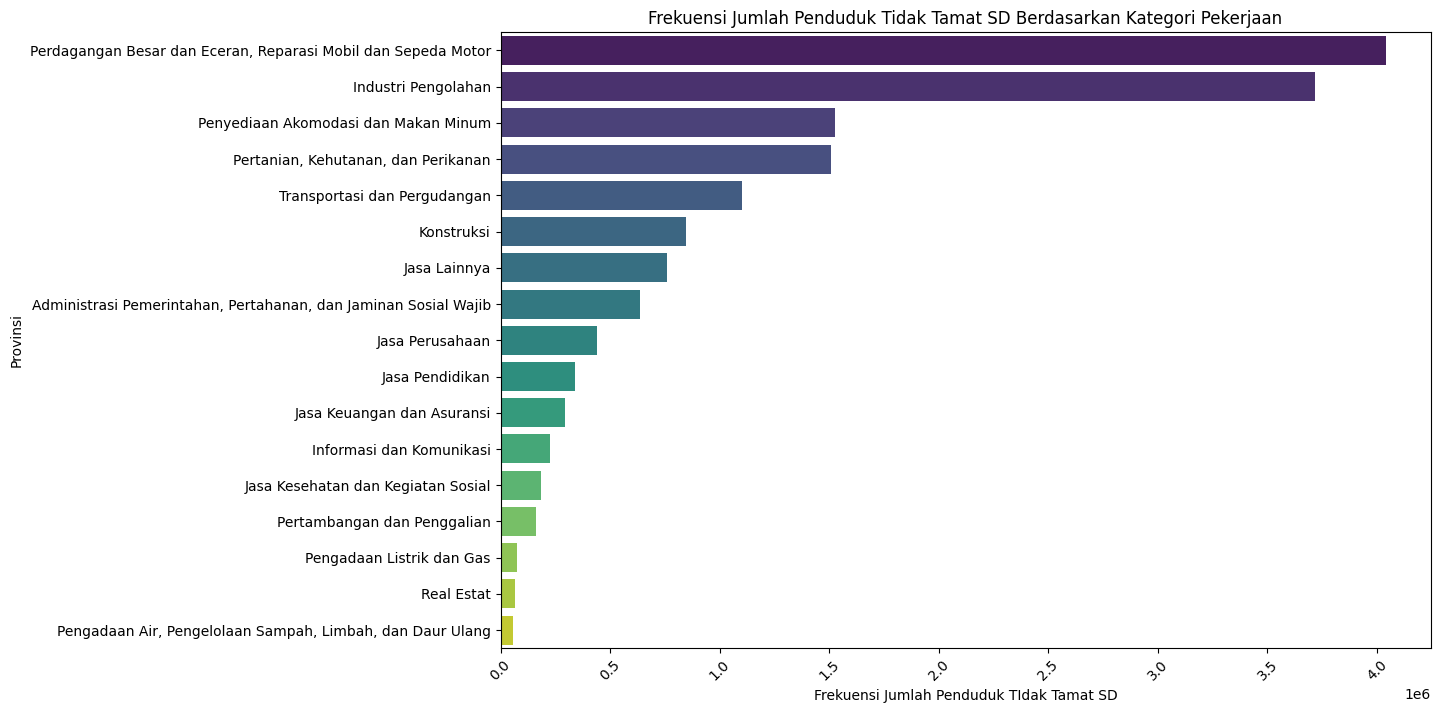

In [45]:
# Menampilkan jenis pekerjaan dari individu lulusan SMK
dpk_population_status = dpk_population.sort_values(by='SMK', ascending=False)

# Buat plot barchart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='SMK', y='Jenis Pekerjaan', data=dpk_population_status, ci=None, palette='viridis')

# Label dan judul
plt.xlabel('Frekuensi Jumlah Penduduk TIdak Tamat SD')
plt.ylabel('Provinsi')
plt.title('Frekuensi Jumlah Penduduk Tidak Tamat SD Berdasarkan Kategori Pekerjaan')

# Putar label sumbu X
plt.xticks(rotation=45)

plt.show()

In [46]:
# Mengurutkan data berdasarkan kolom 'SMK'
dpk_population_status = dpk_population.sort_values(by='SMK', ascending=False)

# Membuat tabel data
tabel_data = dpk_population_status[['Jenis Pekerjaan', 'SMK']]
tabel_data.head()

,Jenis Pekerjaan,SMK
6,"Perdagangan Besar dan Eceran, Reparasi Mobil d...",4042332
2,Industri Pengolahan,3715198
8,Penyediaan Akomodasi dan Makan Minum,1527019
0,"Pertanian, Kehutanan, dan Perikanan",1507526
7,Transportasi dan Pergudangan,1102963


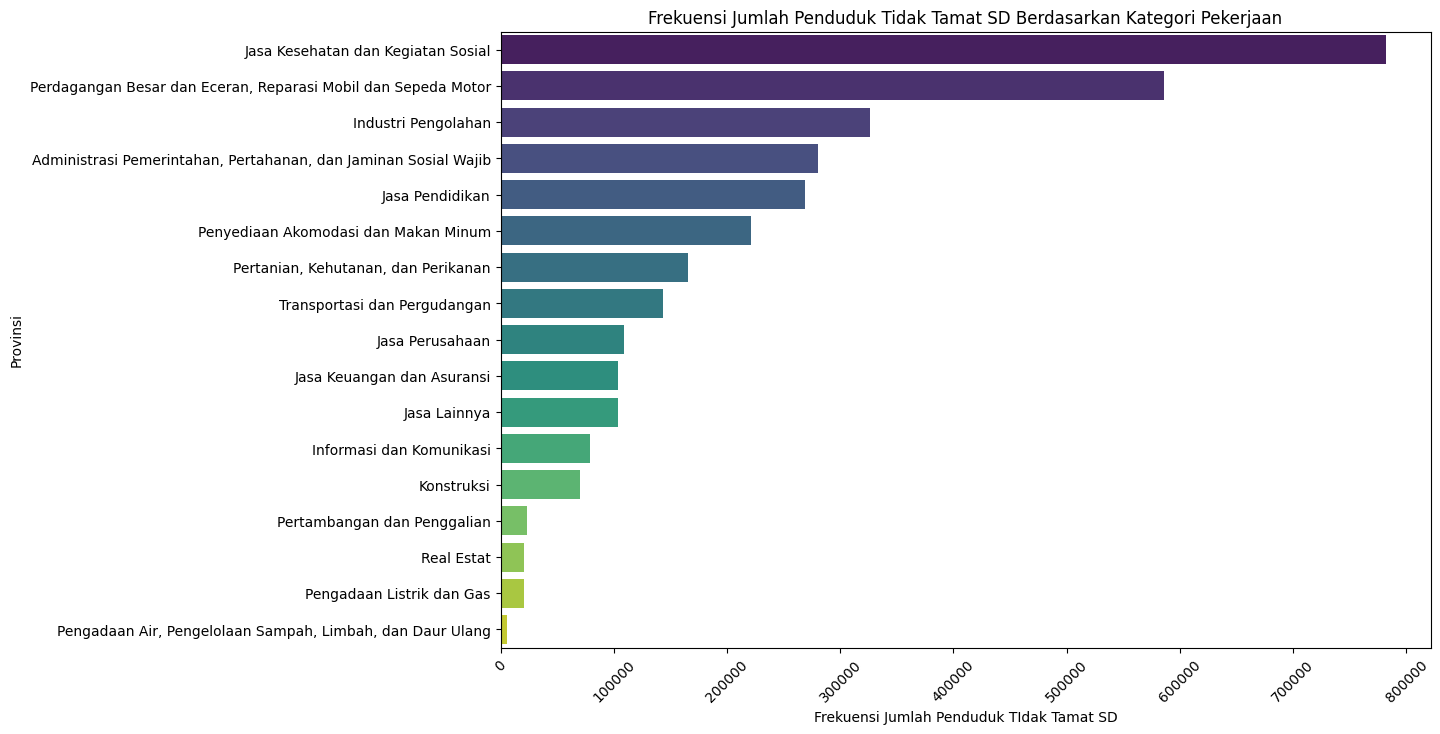

In [47]:
# Menampilkan jenis pekerjaan dari individu lulusan diploma
dpk_population_status = dpk_population.sort_values(by='Diploma', ascending=False)

# Buat plot barchart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Diploma', y='Jenis Pekerjaan', data=dpk_population_status, ci=None, palette='viridis')

# Label dan judul
plt.xlabel('Frekuensi Jumlah Penduduk TIdak Tamat SD')
plt.ylabel('Provinsi')
plt.title('Frekuensi Jumlah Penduduk Tidak Tamat SD Berdasarkan Kategori Pekerjaan')

# Putar label sumbu X
plt.xticks(rotation=45)

plt.show()

In [48]:
# Mengurutkan data berdasarkan kolom 'Diploma'
dpk_population_status = dpk_population.sort_values(by='Diploma', ascending=False)

# Membuat tabel data
tabel_data = dpk_population_status[['Jenis Pekerjaan', 'Diploma']]
tabel_data.head()

,Jenis Pekerjaan,Diploma
15,Jasa Kesehatan dan Kegiatan Sosial,782258
6,"Perdagangan Besar dan Eceran, Reparasi Mobil d...",585644
2,Industri Pengolahan,326655
13,"Administrasi Pemerintahan, Pertahanan, dan Jam...",280324
14,Jasa Pendidikan,269108


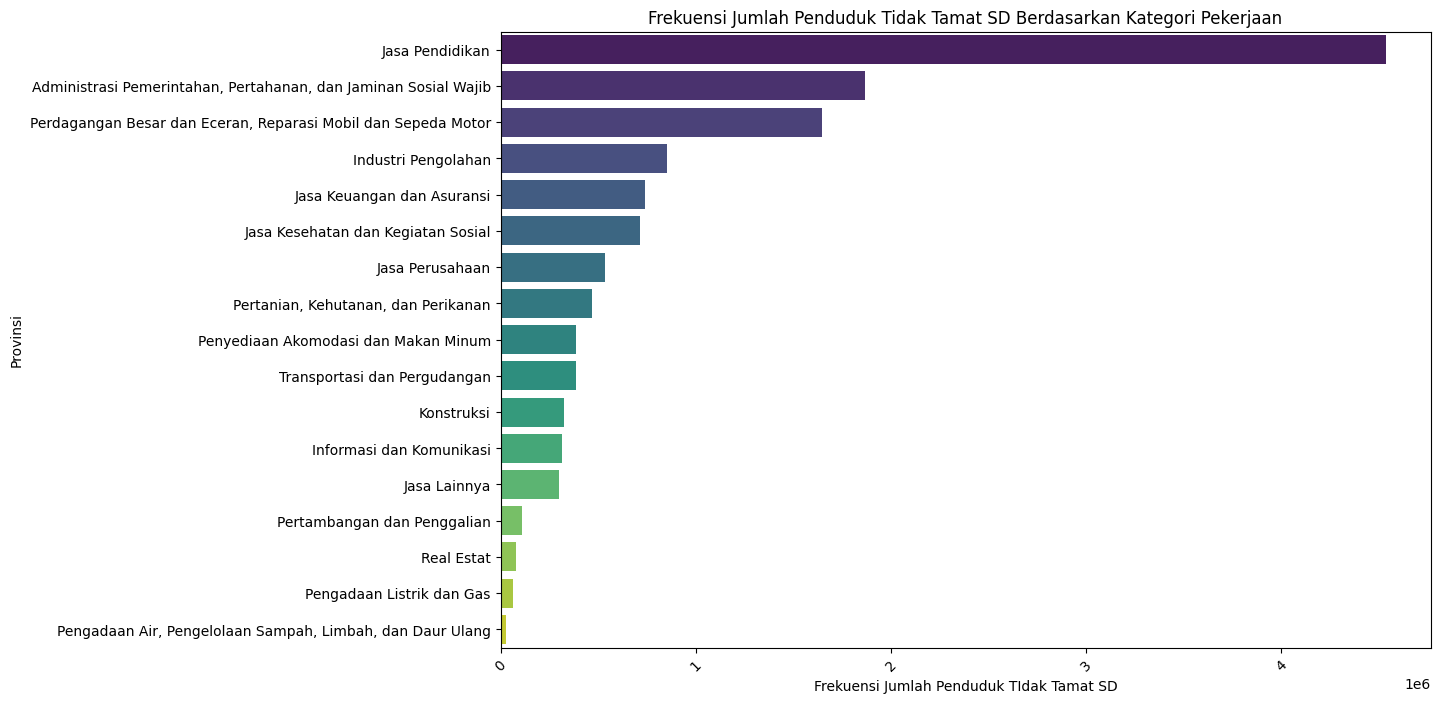

In [49]:
# Menampilkan jenis pekerjaan dari individu yang Sarjana
dpk_population_status = dpk_population.sort_values(by='Sarjana', ascending=False)

# Buat plot barchart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Sarjana', y='Jenis Pekerjaan', data=dpk_population_status, ci=None, palette='viridis')

# Label dan judul
plt.xlabel('Frekuensi Jumlah Penduduk TIdak Tamat SD')
plt.ylabel('Provinsi')
plt.title('Frekuensi Jumlah Penduduk Tidak Tamat SD Berdasarkan Kategori Pekerjaan')

# Putar label sumbu X
plt.xticks(rotation=45)

plt.show()

In [50]:
# Mengurutkan data berdasarkan kolom'Sarjana'
dpk_population_status = dpk_population.sort_values(by='Sarjana', ascending=False)

# Membuat tabel data
tabel_data = dpk_population_status[['Jenis Pekerjaan', 'Sarjana']]
tabel_data.head()

,Jenis Pekerjaan,Sarjana
14,Jasa Pendidikan,4537105
13,"Administrasi Pemerintahan, Pertahanan, dan Jam...",1868510
6,"Perdagangan Besar dan Eceran, Reparasi Mobil d...",1647498
2,Industri Pengolahan,851629
10,Jasa Keuangan dan Asuransi,742314
